# EDA

In [2]:
import numpy as np 
import pandas as pd
from tqdm import tqdm_notebook 
import warnings
import gc
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Define the data directory path
data_dir = 'data/'

In [4]:
# Analyzing the given data

# Reading the data
historical_transactions = pd.read_csv(data_dir + 'historical_transactions.csv')
new_merchant_transactions = pd.read_csv(data_dir + 'new_merchant_transactions.csv')
train = pd.read_csv(data_dir + 'train.csv')
test = pd.read_csv(data_dir + 'test.csv')
merchants = pd.read_csv(data_dir + 'merchants.csv')

### Train and Test Data Analysis

In [5]:
# Checking the train data
train.head()

,first_active_month,card_id,feature_1,feature_2,feature_3,target
0,2017-06,C_ID_92a2005557,5,2,1,-0.820283
1,2017-01,C_ID_3d0044924f,4,1,0,0.392913
2,2016-08,C_ID_d639edf6cd,2,2,0,0.688056
3,2017-09,C_ID_186d6a6901,4,3,0,0.142495
4,2017-11,C_ID_cdbd2c0db2,1,3,0,-0.159749


In [6]:
# Checking the test data
test.head()

,first_active_month,card_id,feature_1,feature_2,feature_3
0,2017-04,C_ID_0ab67a22ab,3,3,1
1,2017-01,C_ID_130fd0cbdd,2,3,0
2,2017-08,C_ID_b709037bc5,5,1,1
3,2017-12,C_ID_d27d835a9f,2,1,0
4,2015-12,C_ID_2b5e3df5c2,5,1,1


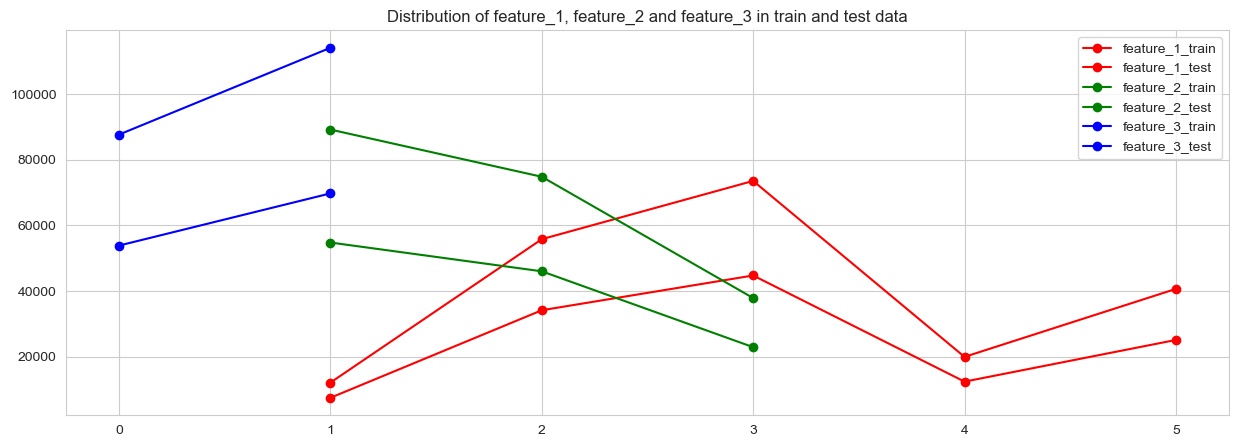

In [7]:
# Plotting the feature_1, feature_2 and feature_3 for both train and test data on 1 single bar plot
plt.figure(figsize=(15, 5))
plt.plot(train['feature_1'].value_counts().sort_index(), 'o-', label='feature_1_train', color='r')
plt.plot(test['feature_1'].value_counts().sort_index(), 'o-', label='feature_1_test', color='r')
plt.plot(train['feature_2'].value_counts().sort_index(), 'o-', label='feature_2_train', color='g')
plt.plot(test['feature_2'].value_counts().sort_index(), 'o-', label='feature_2_test', color='g')
plt.plot(train['feature_3'].value_counts().sort_index(), 'o-', label='feature_3_train', color='b')
plt.plot(test['feature_3'].value_counts().sort_index(), 'o-', label='feature_3_test', color='b')
plt.title('Distribution of feature_1, feature_2 and feature_3 in train and test data')
plt.legend()

### Historical and New Merchant Transactions Data Analysis

In [8]:
# Checking the historical transactions data
historical_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [9]:
# Checking the new merchant transactions data
new_merchant_transactions.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_415bb3a509,107,N,1,B,307,M_ID_b0c793002c,1,-0.557574,2018-03-11 14:57:36,1.0,9,19
1,Y,C_ID_415bb3a509,140,N,1,B,307,M_ID_88920c89e8,1,-0.569580,2018-03-19 18:53:37,1.0,9,19
2,Y,C_ID_415bb3a509,330,N,1,B,507,M_ID_ad5237ef6b,2,-0.551037,2018-04-26 14:08:44,1.0,9,14
3,Y,C_ID_415bb3a509,-1,Y,1,B,661,M_ID_9e84cda3b1,1,-0.671925,2018-03-07 09:43:21,NaN,-1,8
4,Y,C_ID_ef55cf8d4b,-1,Y,1,B,166,M_ID_3c86fa3831,1,-0.659904,2018-03-22 21:07:53,NaN,-1,29


In [10]:
# Display the column of historical transactions data and new merchant transactions data in a table
transactions_columns = pd.DataFrame({'historical_transactions': historical_transactions.columns, 'new_merchant_transactions': new_merchant_transactions.columns})
transactions_columns

,historical_transactions,new_merchant_transactions
0,authorized_flag,authorized_flag
1,card_id,card_id
2,city_id,city_id
3,category_1,category_1
4,installments,installments
5,category_3,category_3
6,merchant_category_id,merchant_category_id
7,merchant_id,merchant_id
8,month_lag,month_lag
9,purchase_amount,purchase_amount


In [11]:
# Print the number of unique of the values in the historical transactions data and new merchant transactions columns
transactions_columns['historical_transactions_num_unique'] = [historical_transactions[col].nunique() for col in historical_transactions.columns]
transactions_columns['new_merchant_transactions_num_unique'] = [new_merchant_transactions[col].nunique() for col in new_merchant_transactions.columns]

# Reorganize the columns
transactions_columns = transactions_columns[['historical_transactions', 'historical_transactions_num_unique', 'new_merchant_transactions', 'new_merchant_transactions_num_unique']]

transactions_columns

,historical_transactions,historical_transactions_num_unique,new_merchant_transactions,new_merchant_transactions_num_unique
0,authorized_flag,2,authorized_flag,1
1,card_id,325540,card_id,290001
2,city_id,308,city_id,308
3,category_1,2,category_1,2
4,installments,15,installments,15
5,category_3,3,category_3,3
6,merchant_category_id,327,merchant_category_id,314
7,merchant_id,326311,merchant_id,226129
8,month_lag,14,month_lag,2
9,purchase_amount,215014,purchase_amount,75190


In [12]:
# Add the range of the unique values if numerical and add list of unique values if categorical (ignore all id columns)
for col in historical_transactions.columns:
    if 'id' in col:
        transactions_columns.loc[transactions_columns['historical_transactions'] == col, 'historical_transactions_values'] = 'id'
        continue
    if 'date' in col:
        # Retrieve the date range
        transactions_columns.loc[transactions_columns['historical_transactions'] == col, 'historical_transactions_values'] = f'{historical_transactions[col].min()} - {historical_transactions[col].max()}'
        continue
    if historical_transactions[col].dtype != 'object':
        transactions_columns.loc[transactions_columns['historical_transactions'] == col, 'historical_transactions_values'] = f'{historical_transactions[col].min()} - {historical_transactions[col].max()}'
    else:
        transactions_columns.loc[transactions_columns['historical_transactions'] == col, 'historical_transactions_values'] = str(list(historical_transactions[col].unique()))
for col in new_merchant_transactions.columns:
    if 'id' in col:
        transactions_columns.loc[transactions_columns['new_merchant_transactions'] == col, 'new_merchant_transactions_values'] = 'id'
        continue
    if 'date' in col:
        # Retrieve the date range
        transactions_columns.loc[transactions_columns['new_merchant_transactions'] == col, 'new_merchant_transactions_values'] = f'{new_merchant_transactions[col].min()} - {new_merchant_transactions[col].max()}'
        continue
    if new_merchant_transactions[col].dtype != 'object':
        transactions_columns.loc[transactions_columns['new_merchant_transactions'] == col, 'new_merchant_transactions_values'] = f'{new_merchant_transactions[col].min()} - {new_merchant_transactions[col].max()}'
    else:
        transactions_columns.loc[transactions_columns['new_merchant_transactions'] == col, 'new_merchant_transactions_values'] = str(list(new_merchant_transactions[col].unique()))

# Reorganize the columns
transactions_columns = transactions_columns[['historical_transactions', 'historical_transactions_num_unique', 'historical_transactions_values', 'new_merchant_transactions', 'new_merchant_transactions_num_unique', 'new_merchant_transactions_values']]

transactions_columns

/var/folders/15/zxrjx0b91yngx3vx7r9sbq4h0000gn/T/ipykernel_49958/2185893410.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_columns.loc[transactions_columns['historical_transactions'] == col, 'historical_transactions_values'] = str(list(historical_transactions[col].unique()))
/var/folders/15/zxrjx0b91yngx3vx7r9sbq4h0000gn/T/ipykernel_49958/2185893410.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactions_columns.loc[transactions_columns['new_merchant_transactions'] == col, 'new_

,historical_transactions,historical_transactions_num_unique,historical_transactions_values,new_merchant_transactions,new_merchant_transactions_num_unique,new_merchant_transactions_values
0,authorized_flag,2,"['Y', 'N']",authorized_flag,1,['Y']
1,card_id,325540,id,card_id,290001,id
2,city_id,308,id,city_id,308,id
3,category_1,2,"['N', 'Y']",category_1,2,"['N', 'Y']"
4,installments,15,-1 - 999,installments,15,-1 - 999
5,category_3,3,"['A', 'B', 'C', nan]",category_3,3,"['B', nan, 'C', 'A']"
6,merchant_category_id,327,id,merchant_category_id,314,id
7,merchant_id,326311,id,merchant_id,226129,id
8,month_lag,14,-13 - 0,month_lag,2,1 - 2
9,purchase_amount,215014,-0.7469078 - 6010603.9717525,purchase_amount,75190,-0.74689277 - 263.15749789


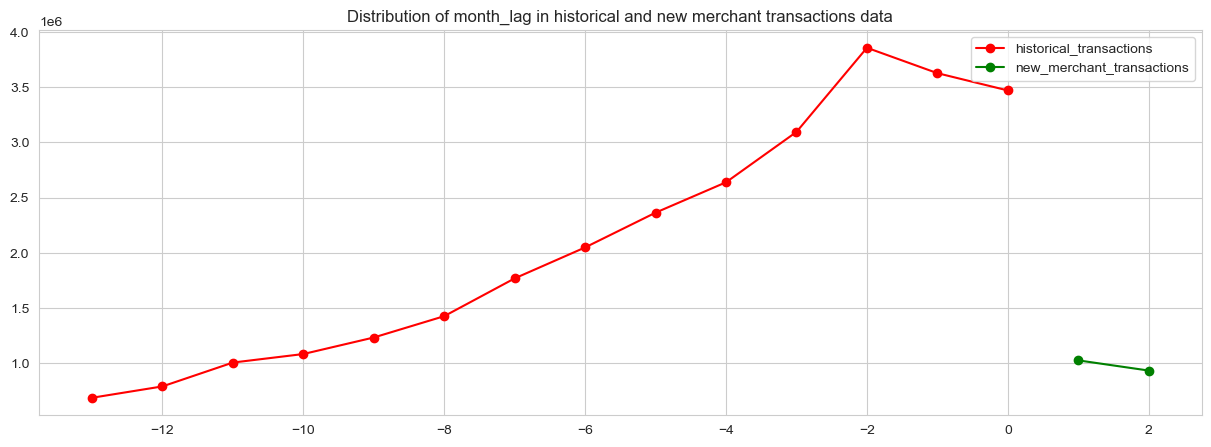

In [13]:
# Plot the distribution for the month_lag for the 2 merchant transactions dfs
plt.figure(figsize=(15, 5))
plt.plot(historical_transactions['month_lag'].value_counts().sort_index(), 'o-', label='historical_transactions', color='r')
plt.plot(new_merchant_transactions['month_lag'].value_counts().sort_index(), 'o-', label='new_merchant_transactions', color='g')
plt.title('Distribution of month_lag in historical and new merchant transactions data')
plt.legend()
plt.show()

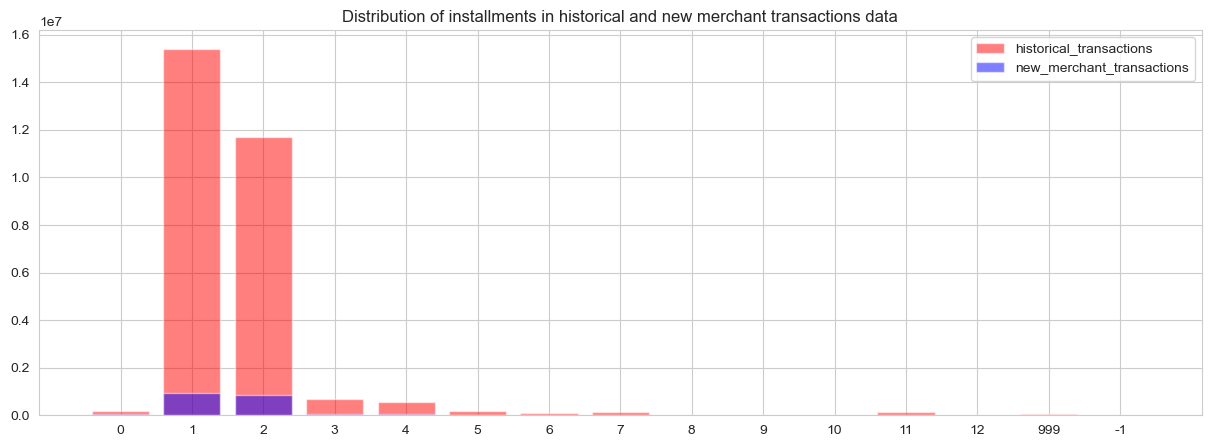

In [14]:
# Plot the installments distribution for the 2 merchant transactions dfs in barchart with classes all unique values
installments_unique_values = historical_transactions['installments'].unique().tolist()
installments_unique_values.extend(new_merchant_transactions['installments'].unique().tolist())
installments_unique_values = list(set(installments_unique_values))
installments_unique_values = [str(x) for x in installments_unique_values]
plt.figure(figsize=(15, 5))
# Define the bar chart
plt.bar(installments_unique_values, historical_transactions['installments'].value_counts().sort_index(), label='historical_transactions', color='r', alpha=0.5)
plt.bar(installments_unique_values, new_merchant_transactions['installments'].value_counts().sort_index(), label='new_merchant_transactions', color='b', alpha=0.5)
plt.title('Distribution of installments in historical and new merchant transactions data')
plt.legend()

In [15]:
# Get the month and year from the purchase date
historical_transactions['purchase_date'] = pd.to_datetime(historical_transactions['purchase_date'])
historical_transactions['purchase_month'] = historical_transactions['purchase_date'].dt.month
historical_transactions['purchase_year'] = historical_transactions['purchase_date'].dt.year

new_merchant_transactions['purchase_date'] = pd.to_datetime(new_merchant_transactions['purchase_date'])
new_merchant_transactions['purchase_month'] = new_merchant_transactions['purchase_date'].dt.month
new_merchant_transactions['purchase_year'] = new_merchant_transactions['purchase_date'].dt.year

# Display the purchase month and year for historical and new merchant transactions
historical_transactions[['purchase_month', 'purchase_year']].head()

,purchase_month,purchase_year
0,6,2017
1,7,2017
2,8,2017
3,9,2017
4,3,2017


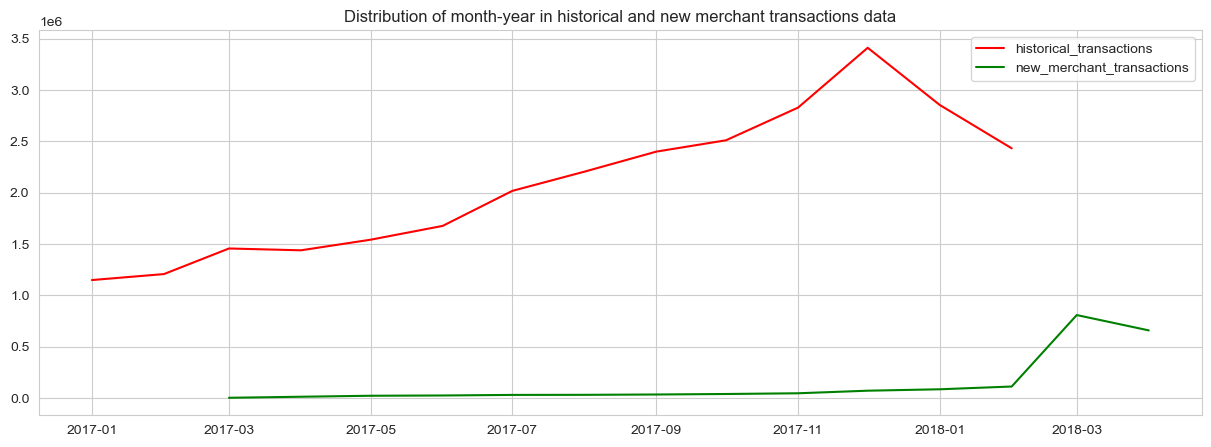

In [16]:
import matplotlib.dates as mdates

# Convert the 'purchase_year' and 'purchase_month' to datetime format
historical_transactions['purchase_date_m_y'] = pd.to_datetime(historical_transactions['purchase_year'].astype(str) + '-' + historical_transactions['purchase_month'].astype(str))
new_merchant_transactions['purchase_date_m_y'] = pd.to_datetime(new_merchant_transactions['purchase_year'].astype(str) + '-' + new_merchant_transactions['purchase_month'].astype(str))

plt.figure(figsize=(15, 5))

# Plot the data
plt.plot(historical_transactions.groupby('purchase_date_m_y').size(), label='historical_transactions', color='r')
plt.plot(new_merchant_transactions.groupby('purchase_date_m_y').size(), label='new_merchant_transactions', color='g')

# Format the x-axis to show dates in the 'YYYY-MM' format
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title('Distribution of month-year in historical and new merchant transactions data')
plt.legend()
plt.show()

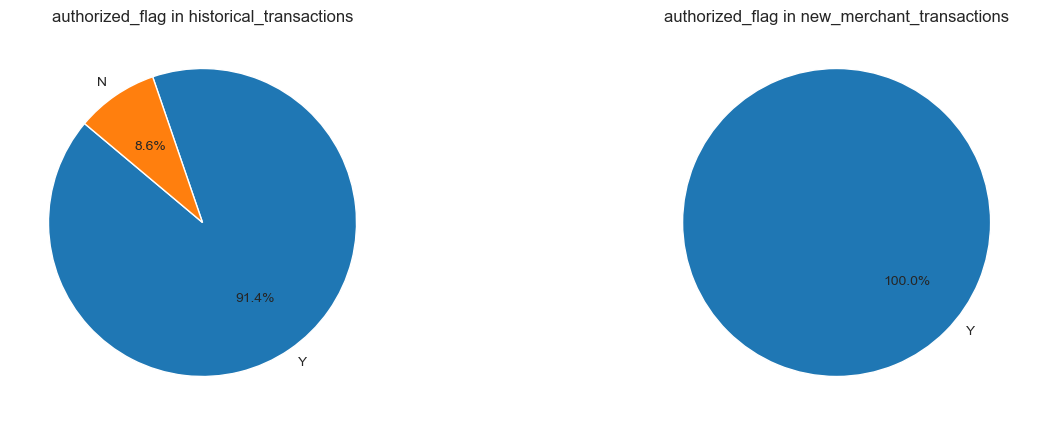

In [17]:
# Plot 2 pie charts for the authorized_flag for the 2 merchant transactions dfs
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(historical_transactions['authorized_flag'].value_counts(), labels=historical_transactions['authorized_flag'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('authorized_flag in historical_transactions')
plt.subplot(1, 2, 2)
plt.pie(new_merchant_transactions['authorized_flag'].value_counts(), labels=new_merchant_transactions['authorized_flag'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('authorized_flag in new_merchant_transactions')
plt.show()

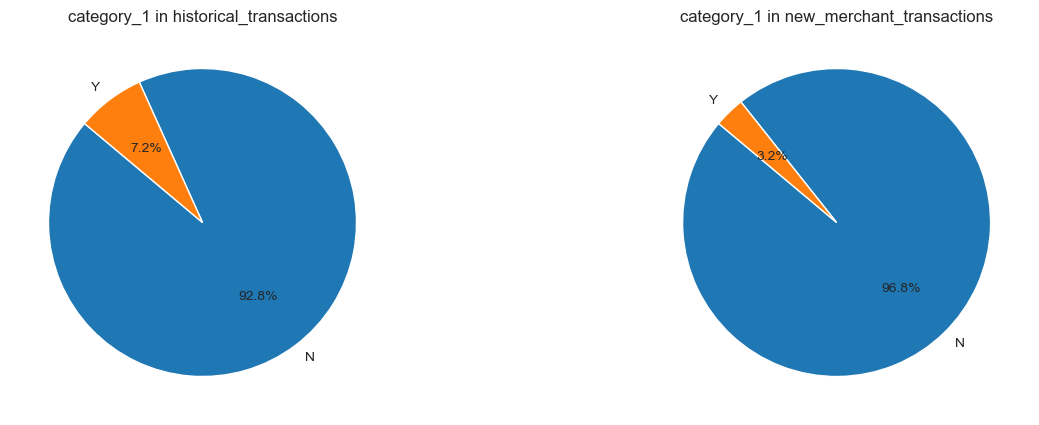

In [18]:
# Plot 2 pie charts for the category_1 for the 2 merchant transactions dfs
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(historical_transactions['category_1'].value_counts(), labels=historical_transactions['category_1'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('category_1 in historical_transactions')
plt.subplot(1, 2, 2)
plt.pie(new_merchant_transactions['category_1'].value_counts(), labels=new_merchant_transactions['category_1'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('category_1 in new_merchant_transactions')
plt.show()

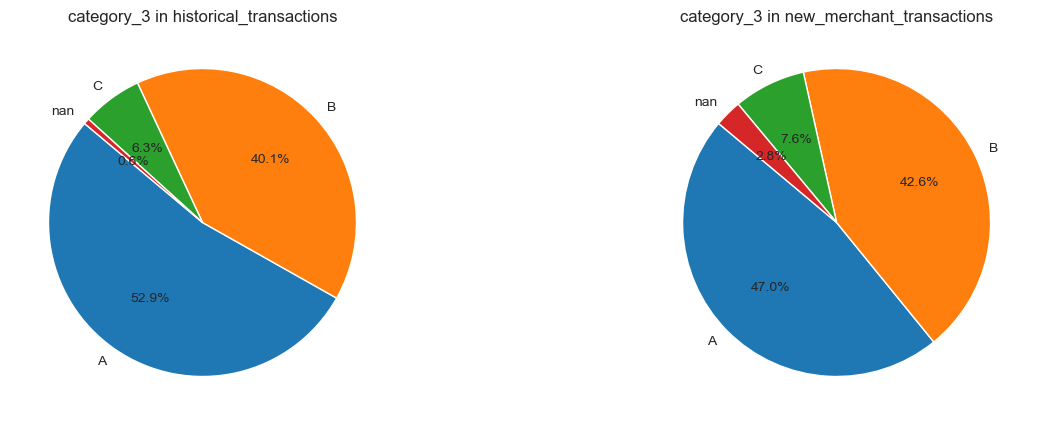

In [19]:
# Plot 2 pie charts for the category_3 for the 2 merchant transactions dfs, show nan values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(historical_transactions['category_3'].value_counts(dropna=False), labels=historical_transactions['category_3'].value_counts(dropna=False).index, autopct='%1.1f%%', startangle=140)
plt.title('category_3 in historical_transactions')
plt.subplot(1, 2, 2)
plt.pie(new_merchant_transactions['category_3'].value_counts(dropna=False), labels=new_merchant_transactions['category_3'].value_counts(dropna=False).index, autopct='%1.1f%%', startangle=140)
plt.title('category_3 in new_merchant_transactions')
plt.show()

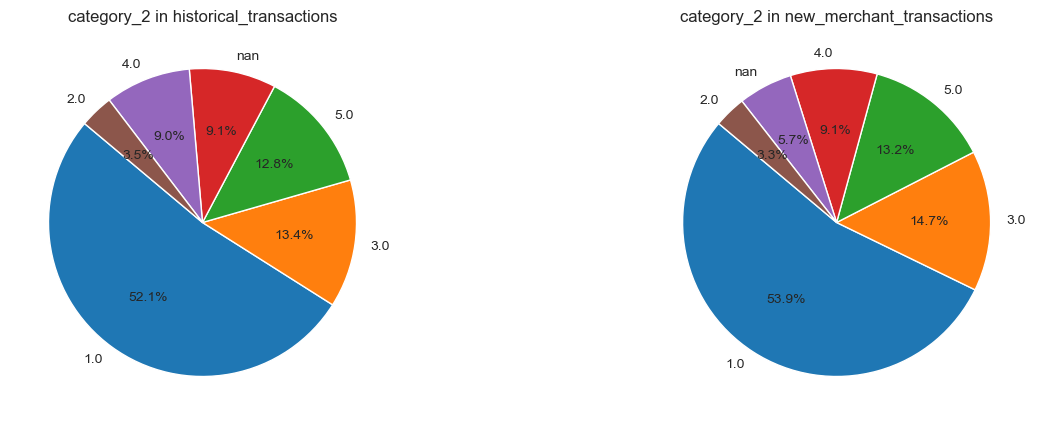

In [20]:
# Plot 2 pie charts for the category_2 for the 2 merchant transactions dfs, show nan values
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(historical_transactions['category_2'].value_counts(dropna=False), labels=historical_transactions['category_2'].value_counts(dropna=False).index, autopct='%1.1f%%', startangle=140)
plt.title('category_2 in historical_transactions')
plt.subplot(1, 2, 2)
plt.pie(new_merchant_transactions['category_2'].value_counts(dropna=False), labels=new_merchant_transactions['category_2'].value_counts(dropna=False).index, autopct='%1.1f%%', startangle=140)
plt.title('category_2 in new_merchant_transactions')
plt.show()

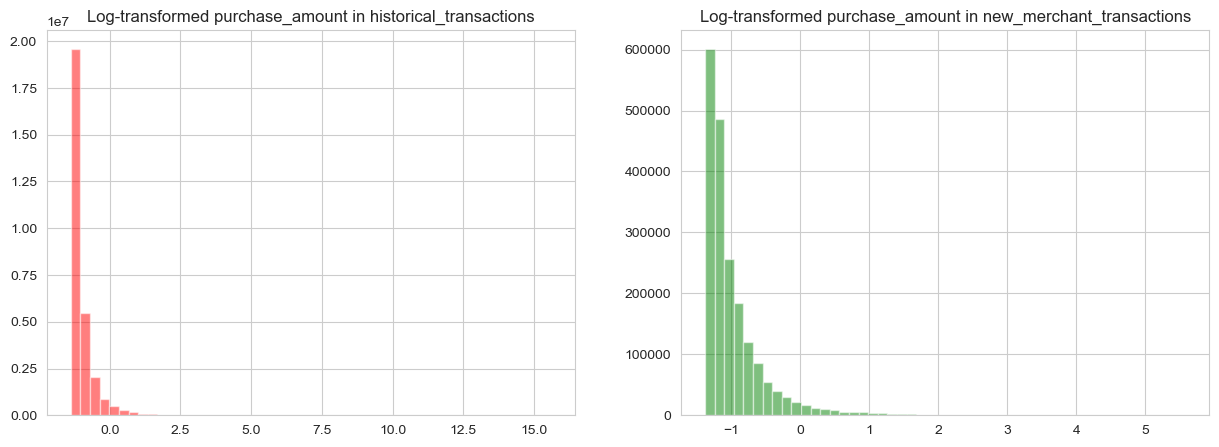

In [21]:
# Plot the histogram for the purchase_amount for the 2 merchant transactions dfs
plt.figure(figsize=(15, 5))

# Apply log transformation to 'purchase_amount' and plot the histogram
plt.subplot(1, 2, 1)
plt.hist(np.log1p(historical_transactions['purchase_amount']), bins=50, color='r', alpha=0.5)
plt.title('Log-transformed purchase_amount in historical_transactions')

plt.subplot(1, 2, 2)
plt.hist(np.log1p(new_merchant_transactions['purchase_amount']), bins=50, color='g', alpha=0.5)
plt.title('Log-transformed purchase_amount in new_merchant_transactions')

plt.show()

### Merchants Data Analysis

In [22]:
# Checking the merchants data
merchants.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN


In [23]:
# Display the column of merchants data in a table
merchants_columns = pd.DataFrame({'merchants': merchants.columns})

# Calculate the number of unique values in each column
merchants_columns['merchants_num_unique'] = [merchants[col].nunique() for col in merchants.columns]

# Calculate the range of the unique values if numerical and list of unique values if categorical
for col in merchants.columns:
    if 'id' in col:
        merchants_columns.loc[merchants_columns['merchants'] == col, 'merchants_values'] = 'id'
        continue
    if merchants[col].dtype != 'object':
        merchants_columns.loc[merchants_columns['merchants'] == col, 'merchants_values'] = f'{merchants[col].min()} - {merchants[col].max()}'
    else:
        merchants_columns.loc[merchants_columns['merchants'] == col, 'merchants_values'] = str(list(merchants[col].unique()))
        
merchants_columns

,merchants,merchants_num_unique,merchants_values
0,merchant_id,334633,id
1,merchant_group_id,109391,id
2,merchant_category_id,324,id
3,subsector_id,41,id
4,numerical_1,954,-0.05747065 - 183.73511137
5,numerical_2,947,-0.05747065 - 182.07932234
6,category_1,2,"['N', 'Y']"
7,most_recent_sales_range,5,"['E', 'C', 'D', 'A', 'B']"
8,most_recent_purchases_range,5,"['E', 'D', 'C', 'A', 'B']"
9,avg_sales_lag3,3372,-82.13 - 851844.64


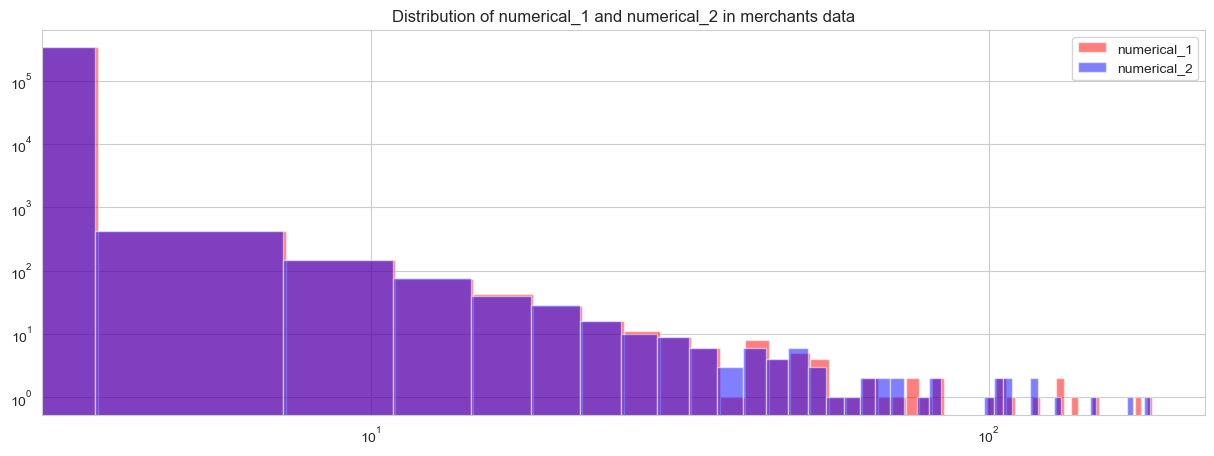

In [29]:
# Plot the numerical 1 & 2 columns in the merchants data in a histogram log-log
plt.figure(figsize=(15, 5))
plt.hist(merchants['numerical_1'], bins=50, label='numerical_1', color='r', alpha=0.5)
plt.hist(merchants['numerical_2'], bins=50, label='numerical_2', color='b', alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of numerical_1 and numerical_2 in merchants data')
plt.legend()
plt.show()

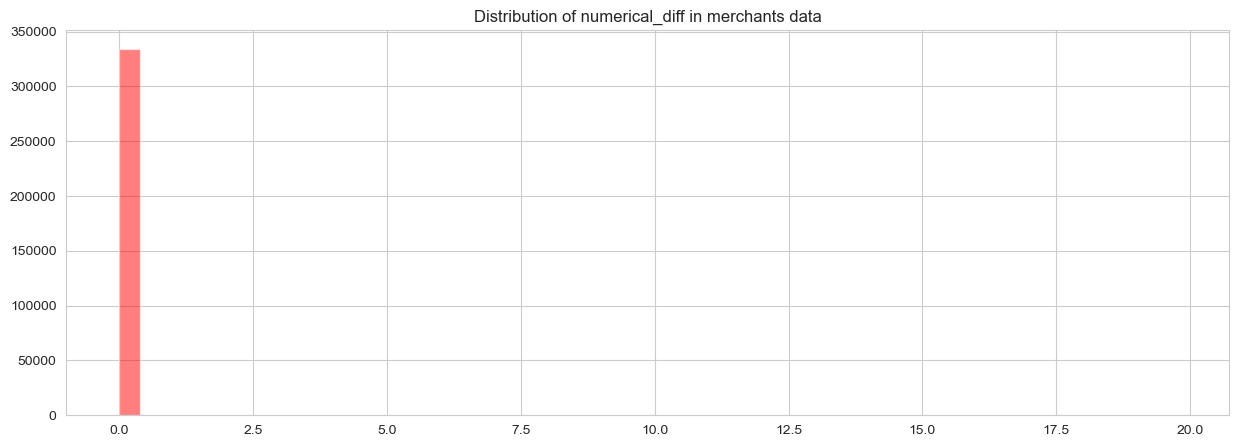

In [32]:
# calculate the distribution of the difference between the 2 numerical columns
merchants['numerical_diff'] = merchants['numerical_1'] - merchants['numerical_2']

# Plot the histogram of the numerical_diff column
plt.figure(figsize=(15, 5))
plt.hist(merchants['numerical_diff'], bins=50, color='r', alpha=0.5)
plt.title('Distribution of numerical_diff in merchants data')
plt.show()

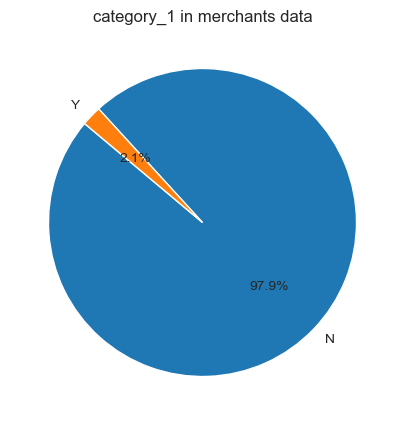

In [34]:
# Plot the pie chart for the category_1 column in the merchants data (with nan)
plt.figure(figsize=(15, 5))
plt.pie(merchants['category_1'].value_counts(dropna=False), labels=merchants['category_1'].value_counts(dropna=False).index, autopct='%1.1f%%', startangle=140)
plt.title('category_1 in merchants data')
plt.show()

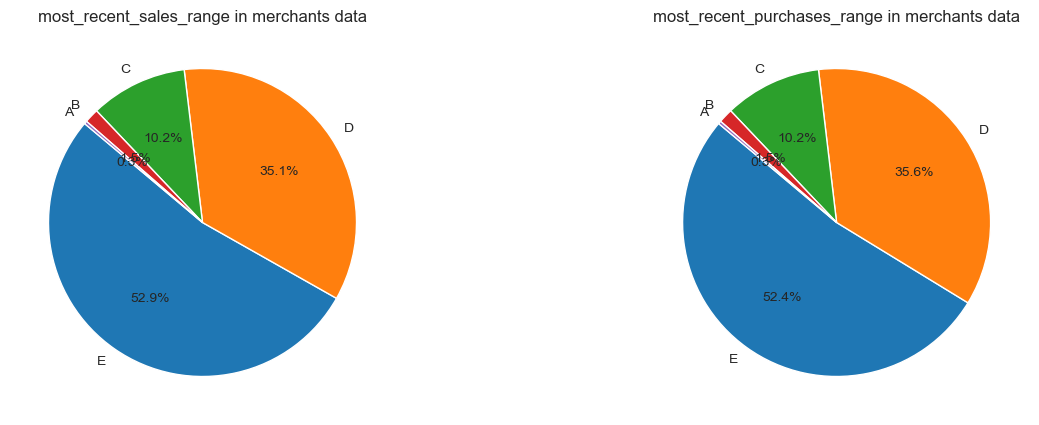

In [35]:
# Plot the most_recent_sales_range and most_recent_purchases_range columns in a pie chart (with nan) next to each other
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.pie(merchants['most_recent_sales_range'].value_counts(dropna=False), labels=merchants['most_recent_sales_range'].value_counts(dropna=False).index, autopct='%1.1f%%', startangle=140)
plt.title('most_recent_sales_range in merchants data')
plt.subplot(1, 2, 2)
plt.pie(merchants['most_recent_purchases_range'].value_counts(dropna=False), labels=merchants['most_recent_purchases_range'].value_counts(dropna=False).index, autopct='%1.1f%%', startangle=140)
plt.title('most_recent_purchases_range in merchants data')
plt.show()

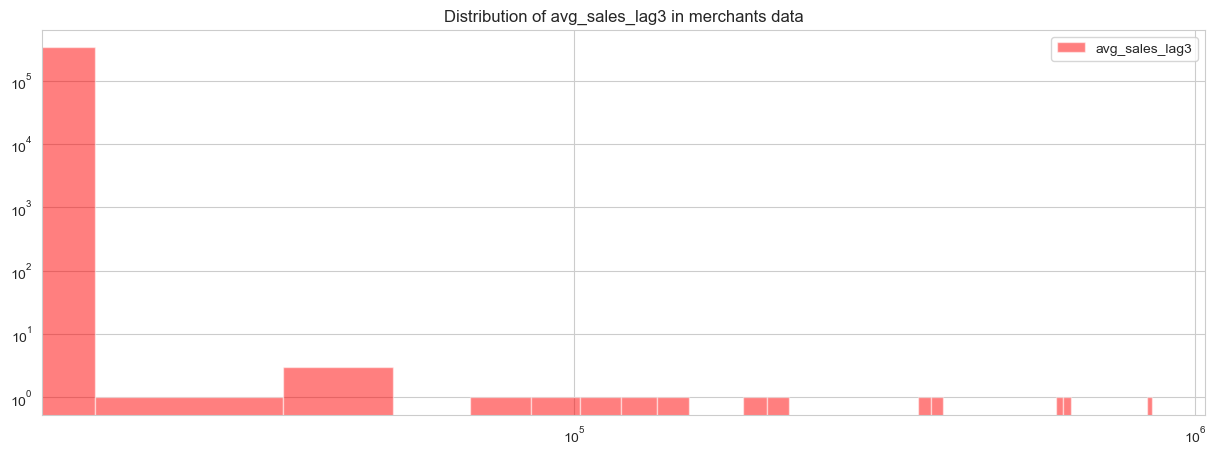

In [40]:
# Plot the average avg_sales_lag3 columns in a histogram
plt.figure(figsize=(15, 5))
plt.hist(merchants['avg_sales_lag3'], bins=50, label='avg_sales_lag3', color='r', alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of avg_sales_lag3 in merchants data')
plt.legend()
plt.show()

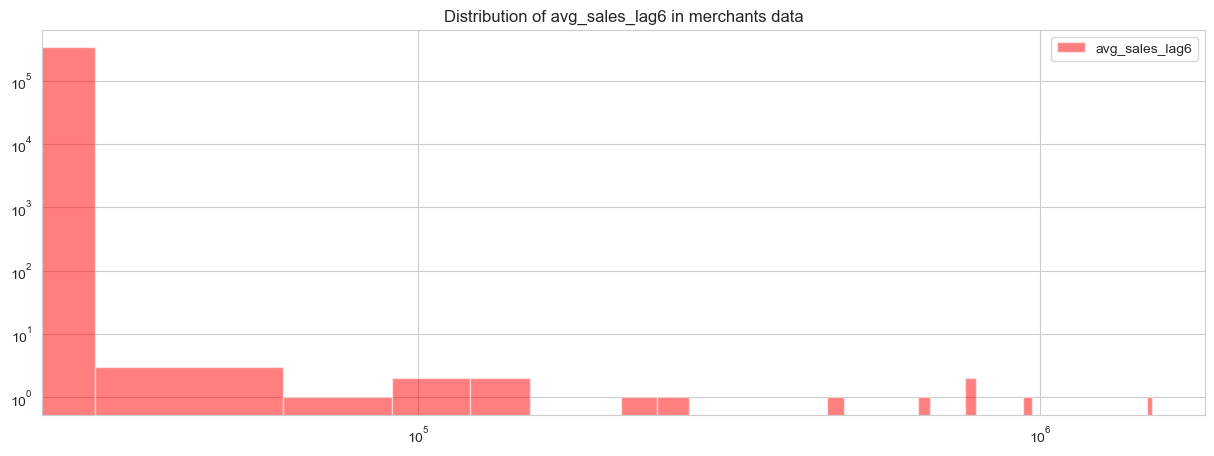

In [42]:
# Plot the average avg_sales_lag6 columns in a histogram
plt.figure(figsize=(15, 5))
plt.hist(merchants['avg_sales_lag6'], bins=50, label='avg_sales_lag6', color='r', alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of avg_sales_lag6 in merchants data')
plt.legend()
plt.show()

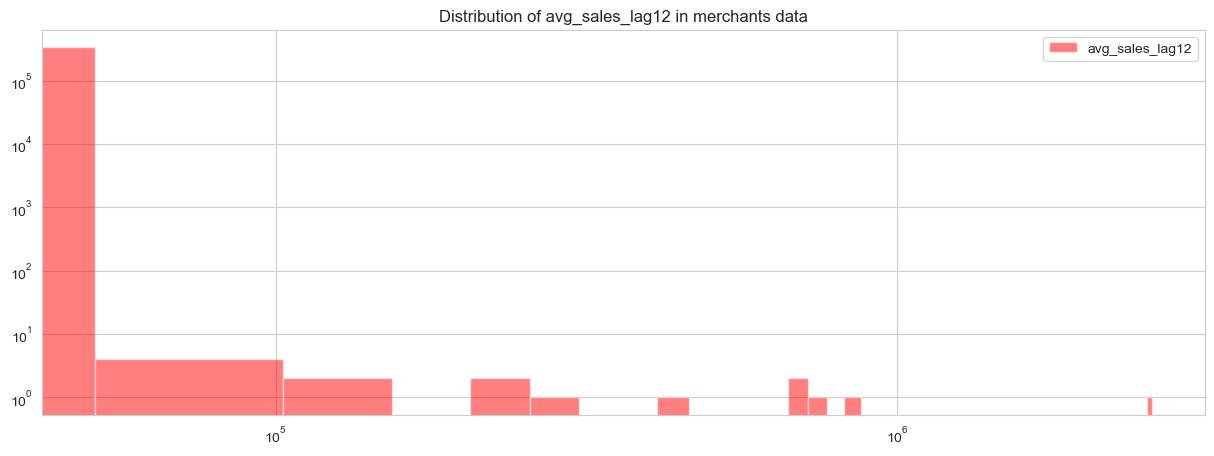

In [43]:
# Plot the average avg_sales_lag12 columns in a histogram
plt.figure(figsize=(15, 5))
plt.hist(merchants['avg_sales_lag12'], bins=50, label='avg_sales_lag12', color='r', alpha=0.5)
plt.yscale('log')
plt.xscale('log')
plt.title('Distribution of avg_sales_lag12 in merchants data')
plt.legend()
plt.show()

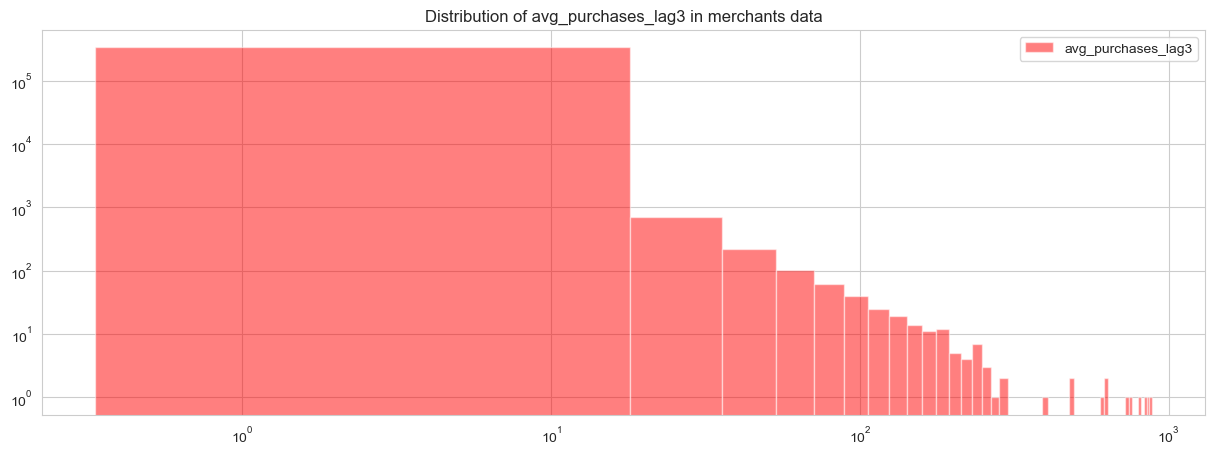

In [52]:
# Plot the average avg_purchases_lag3 columns in a histogram
plt.figure(figsize=(15, 5))
# Remove the inf values
merchants = merchants.replace([np.inf, -np.inf], np.nan)
plt.hist(merchants['avg_purchases_lag3'], bins=50, label='avg_purchases_lag3', color='r', alpha=0.5)
plt.title('Distribution of avg_purchases_lag3 in merchants data')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()